## Transfer Learning VGG 16 for predicting Lung disease

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [17]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [18]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [19]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [20]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [21]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [22]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [24]:

# view the structure of the model
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [26]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [28]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [29]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 1837s 11s/step - loss: 0.2197 - accuracy: 0.9128 - val_loss: 0.3618 - val_accuracy: 0.8750
Epoch 2/5
163/163 [==============================] - 1221s 7s/step - loss: 0.1171 - accuracy: 0.9571 - val_loss: 0.5613 - val_accuracy: 0.8397
Epoch 3/5
163/163 [==============================] - 1168s 7s/step - loss: 0.1067 - accuracy: 0.9603 - val_loss: 0.2707 - val_accuracy: 0.9199
Epoch 4/5
163/163 [==============================] - 1105s 7s/step - loss: 0.0914 - accuracy: 0.9659 - val_loss: 0.3521 - val_accuracy: 0.9135
Epoch 5/5
163/163 [==============================] - 1104s 7s/step - loss: 0.0687 - accuracy: 0.9757 - val_loss: 0.2924 - val_accuracy: 0.9151


In [35]:
r.history

{'loss': [0.21974201500415802,
  0.11713138222694397,
  0.10671564936637878,
  0.09141670167446136,
  0.06871765851974487],
 'accuracy': [0.9127684235572815,
  0.9570552110671997,
  0.9603143930435181,
  0.9658742547035217,
  0.9756518602371216],
 'val_loss': [0.36181044578552246,
  0.561345100402832,
  0.2707315981388092,
  0.3520958423614502,
  0.29244542121887207],
 'val_accuracy': [0.875,
  0.8397436141967773,
  0.9198718070983887,
  0.9134615659713745,
  0.9150640964508057]}

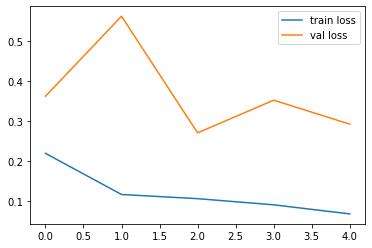

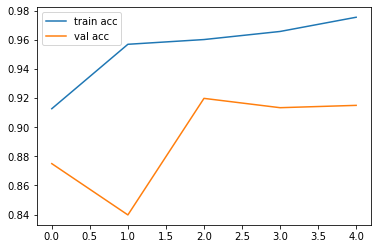

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')